In [1]:
import numpy as np
import torch
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

### Utilities

The test function that is used for illustrating the workings of the optimisers.

In [2]:
def test_function(x):
    return x[0]**2/15.0+x[1]**2

Utility for plotting the contours of a given function `f` in a range `r` (4-tuple) and 20 levels up to a max level given by `s`. 

In [3]:
def plot_contours(r, s, f):
    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['ytick.direction'] = 'out'
    delta = 0.01
    X = np.arange(r[0], r[1], delta)
    Y = np.arange(r[2], r[3], delta)
    X,Y = np.meshgrid(X, Y)  
    XX = np.stack((X,Y), axis=0)
    Z=f(XX)
    V=np.arange(0.2,s,s/20)**2
    #CS = plt.contour(X, Y, Z, V, colors=colors)
    #plt.clabel(CS, inline=1, fontsize=10)
    CS = plt.contour(X, Y, Z, V)

Optimisation (i.e. minimisation) of the function `f` starting at `x` (pytorch tensor), by using the given `optimizer` over `nepochs` epochs.  

In [4]:
def optimize(f, x, nepochs, optimizer):
    params = [x,]
    xhist = [x[0].item()]
    yhist = [x[1].item()]
    optimizer.param_groups[0]['params'] = params
    for i in range(nepochs):
        y = f(x)
        optimizer.zero_grad()
        y.backward()
        optimizer.step()
        xhist.append(x[0].item())    
        yhist.append(x[1].item())
    return xhist, yhist

RMS error for measuring the discrepancy to the final target (for the test function above it is (0,0)). 

In [5]:
def error(xhist,yhist):
    x,y = xhist[-1], yhist[-1]
    return "%6.3f, (%6.3f, %6.3f)"%(np.sqrt(x**2+y**2),x,y)

### Sample Run

SGD - lr=0.3   1.326, (-1.326, -0.000)


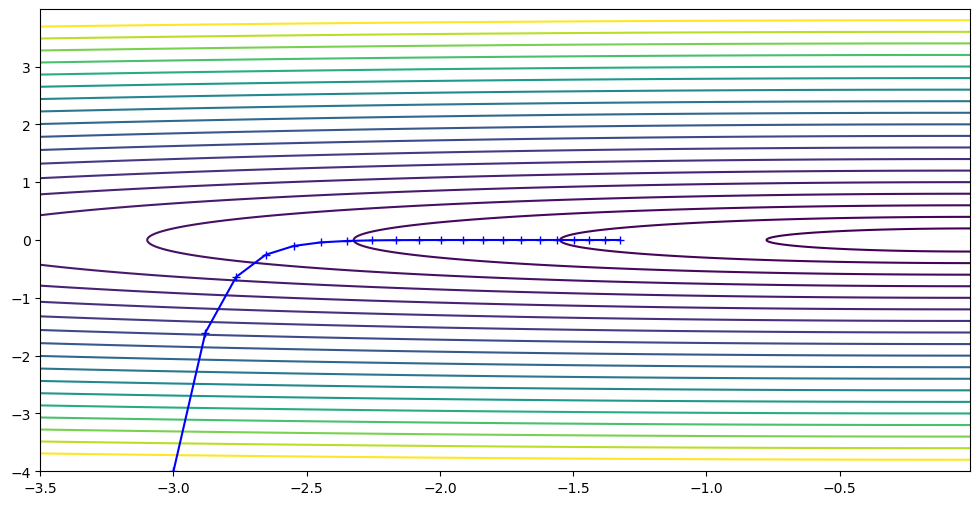

In [6]:
nepochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

# initial value
x = torch.tensor([-3.0,-4.0]).requires_grad_()

optimizer = torch.optim.SGD([x],lr=.3)
xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

plt.plot(xhist,yhist,"b-+", label="lr=0.3")
print("SGD - lr=0.3 ", error(xhist,yhist))


### Tasks 

For better comparison, always use the same (non-optimal) initial point (-3,-4).

* Study SGD for different learning rates. Illustrate the behavior as learned and analysed in week 02.
* Compare Momentum for different momentum parameters ($\beta_1$) and characterise how the optimisation paths qualitatively change.
* Can you spot a difference with / without Nesterov?
* Compare RMSProp for different parameters $\beta_2$ and characterise how the optimisation paths qualitatively change.
* Finally, check different settings for Adam. Identify your best parameters that allows you to get closest the minimum in 25 epochs and with an error of at max 1.0e-3?


### SGD with different learning rates

In [ ]:
nepochs = 20

plt.figure(2,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

# initial value
x = torch.tensor([-3.0,-4.0]).requires_grad_()

learning_rate = np.linspace(0.9, 0.1, 9).round(1)

for lr in learning_rate:
    x = torch.tensor([-3.0,-4.0]).requires_grad_()
    optimizer = torch.optim.SGD([x],lr=lr)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  
    plt.plot(xhist,yhist,"-+", label=f"lr={lr}")
    print(f"SGD - lr={lr} ", error(xhist,yhist))
plt.legend()

### Compare different momentums $\beta_1$ (without Nesterov)

In [ ]:
nepochs = 20

plt.figure(3,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

# initial value
x = torch.tensor([-3.0,-4.0]).requires_grad_()

momentum = np.linspace(0.9, 0.1, 9).round(1)

for beta1 in momentum:
    x = torch.tensor([-3.0,-4.0]).requires_grad_()
    optimizer = torch.optim.SGD([x],lr=0.1, momentum=beta1)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  
    plt.plot(xhist,yhist,"-+", label=f"beta1={beta1}")
    print(f"SGD - beta1={beta1} ", error(xhist,yhist))
plt.legend()

### Compare different momentums $\beta_1$ (with Nesterov)

In [ ]:
nepochs = 20

plt.figure(4,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

# initial value
x = torch.tensor([-3.0,-4.0]).requires_grad_()

momentum = np.linspace(0.9, 0.1, 9).round(1)

for beta1 in momentum:
    x = torch.tensor([-3.0,-4.0]).requires_grad_()
    optimizer = torch.optim.SGD([x],lr=0.1, momentum=beta1, nesterov=True)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  
    plt.plot(xhist,yhist,"-+", label=f"beta1={beta1}")
    print(f"SGD - beta1={beta1} ", error(xhist,yhist))
plt.legend()

### Compare RMSProp for different $\beta_2$

RMSProp - beta2=0.9   1.132, ( 1.131,  0.047)
RMSProp - beta2=0.8   0.398, ( 0.273,  0.289)
RMSProp - beta2=0.7   0.096, ( 0.029,  0.091)
RMSProp - beta2=0.6   0.015, ( 0.004,  0.014)
RMSProp - beta2=0.5   0.002, ( 0.002, -0.001)
RMSProp - beta2=0.4   0.000, ( 0.000, -0.000)
RMSProp - beta2=0.3   0.002, (-0.000, -0.002)
RMSProp - beta2=0.2   0.016, (-0.000, -0.016)
RMSProp - beta2=0.1   0.047, (-0.002, -0.047)


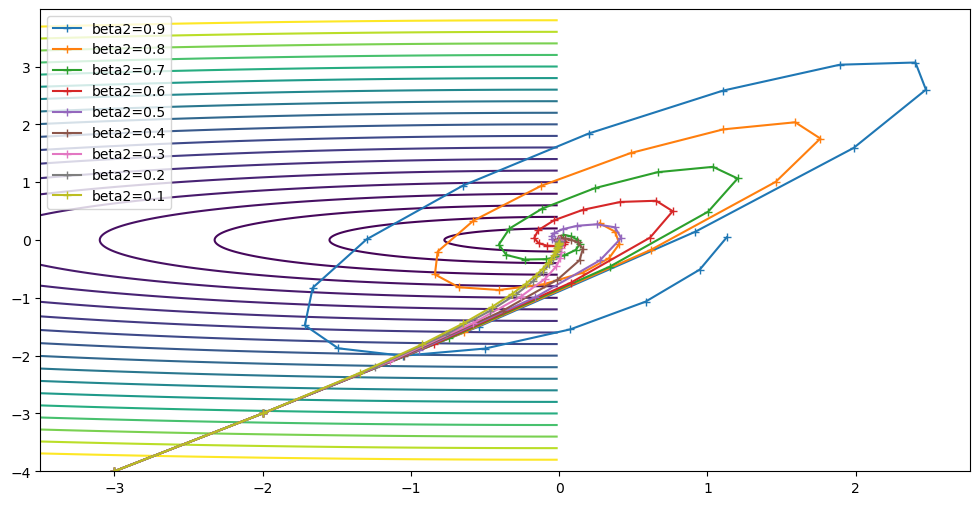

In [42]:
nepochs = 20

plt.figure(5,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

# initial value
x = torch.tensor([-3.0,-4.0]).requires_grad_()

momentum = np.linspace(0.9, 0.1, 9).round(1)

for beta2 in momentum:
    x = torch.tensor([-3.0,-4.0]).requires_grad_()
    optimizer = torch.optim.RMSprop([x], lr=0.1, momentum=beta2)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  
    plt.plot(xhist,yhist,"-+", label=f"beta2={beta2}")
    print(f"RMSProp - beta2={beta2} ", error(xhist,yhist))
plt.legend()

### Compare different settings for Adam

SGD - beta1=0.9, beta2=0.99   0.606, (-0.591, -0.137)
SGD - beta1=0.9, beta2=0.86   0.988, (-0.689, -0.708)
SGD - beta1=0.9, beta2=0.73   1.358, (-0.707, -1.159)
SGD - beta1=0.9, beta2=0.6   1.598, (-0.725, -1.424)
SGD - beta1=0.8, beta2=0.99   0.219, (-0.063, -0.210)
SGD - beta1=0.8, beta2=0.86   0.252, ( 0.208, -0.143)
SGD - beta1=0.8, beta2=0.73   0.298, ( 0.145,  0.260)
SGD - beta1=0.8, beta2=0.6   0.475, ( 0.129,  0.458)
SGD - beta1=0.7, beta2=0.99   0.059, ( 0.026, -0.052)
SGD - beta1=0.7, beta2=0.86   0.066, (-0.028,  0.060)
SGD - beta1=0.7, beta2=0.73   0.125, ( 0.072, -0.102)
SGD - beta1=0.7, beta2=0.6   0.055, (-0.048,  0.027)
SGD - beta1=0.6, beta2=0.99   0.011, ( 0.006, -0.009)
SGD - beta1=0.6, beta2=0.86   0.012, (-0.005,  0.011)
SGD - beta1=0.6, beta2=0.73   0.023, ( 0.018,  0.014)
SGD - beta1=0.6, beta2=0.6   0.100, (-0.007, -0.099)
SGD - beta1=0.5, beta2=0.99   0.002, ( 0.001, -0.002)
SGD - beta1=0.5, beta2=0.86   0.001, ( 0.001,  0.001)
SGD - beta1=0.5, beta2=0.73   0.

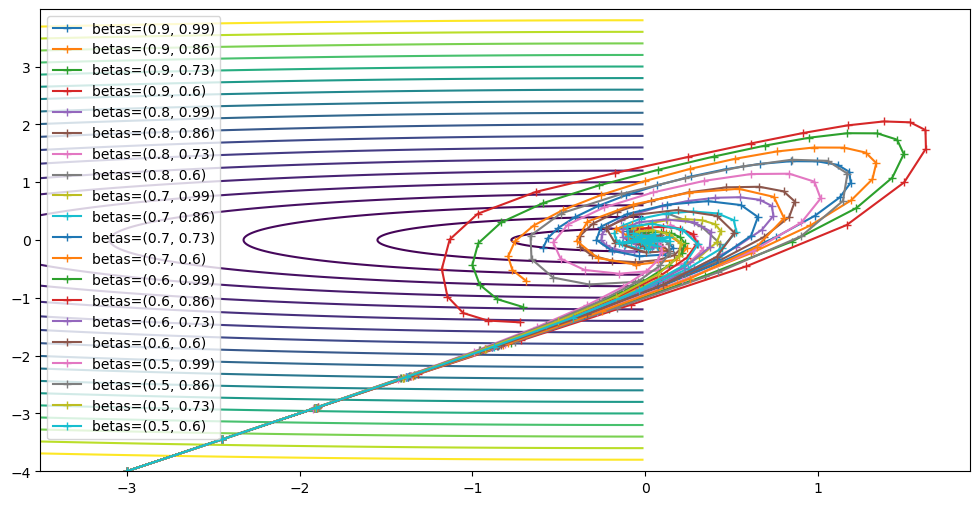

In [74]:
nepochs = 25

plt.figure(6,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

# initial value
x = torch.tensor([-3.0,-4.0]).requires_grad_()

betas1 = np.linspace(0.9, 0.5, 5).round(1)
betas2 = np.linspace(0.99, 0.6, 4).round(2)

for beta1 in betas1:
    for beta2 in betas2:
        x = torch.tensor([-3.0,-4.0]).requires_grad_()
        optimizer = torch.optim.Adam([x], lr=0.55, betas=(beta1, beta2))
        xhist, yhist = optimize(test_function, x, nepochs, optimizer)  
        plt.plot(xhist,yhist,"-+", label=f"betas=({beta1}, {beta2})")
        print(f"SGD - beta1={beta1}, beta2={beta2} ", error(xhist,yhist))
plt.legend()

From the evaluation above, the best result is achieved with: lr=0.55, $\beta_1$=0.5 and $\beta_2$=0.86